In [82]:
import codecs
import os
import pandas as pd
import glob
import nltk
from nltk.corpus import PlaintextCorpusReader

def get_context(c):
    try:

        result = text.concordance_list(c)[0]
        left_of_query = ' '.join(result.left)
        query = result.query
        right_of_query = ' '.join(result.right)
        return left_of_query + ' ' + query + ' ' + right_of_query
    except:
        return ''

generated_dfs = []
BASE_DIR = 'data'
for book in glob.glob(BASE_DIR+'/books/*'):
    book_name = book.split('/')[-1].split('.')[0]
    try:
        DATA_DIR = codecs.open('data/books/' + book_name + '.txt', 'rb', encoding='utf-8').readlines()
        true_data = pd.read_csv('data/ground_truth/'+book_name+'.csv', sep='\t')
#         print (true_data.shape)
#         print ('Reading Book ' + true_data.shape[0])
        full_data = ' '.join([i.lower().strip() for i in DATA_DIR if len(i.strip())>1])
        tokens = nltk.word_tokenize(full_data)
        text = nltk.Text(tokens)
        true_data['firstcontext'] = true_data['word'].map(lambda k: get_context(k))
        generated_dfs.append(true_data)
    except Exception as e:
        pass

(22, 2)
(22, 2)
(67, 2)
(27, 2)
(13, 2)
(20, 2)
(22, 2)
(111, 2)
(19, 2)
(78, 2)
(20, 2)
(20, 2)
(48, 2)
(17, 2)
(17, 2)
(102, 2)
(29, 2)
(62, 2)
(20, 2)
(58, 2)
(20, 2)
(21, 2)
(45, 2)
(32, 2)
(15, 2)
(20, 2)
(20, 2)
(92, 2)
(14, 2)


In [74]:
# pd.concat(generated_dfs[:], axis=0)

In [75]:
final_df = pd.concat(generated_dfs[:], axis=0)
final_df = final_df[final_df['firstcontext']!='']
final_df.shape, len(final_df['word'].unique()), len(final_df['def'].unique()), len(final_df['firstcontext'].unique())

((543, 3), 524, 541, 543)

In [76]:
final_df = final_df[['word', 'def', 'firstcontext']].reset_index()

In [77]:
final_df.drop(['index'], inplace=True, axis=1)

In [78]:
final_df

,word,def,firstcontext
0,propriety,"an awareness of respectability, politeness, an...",client . ââyou doubt its value ? â he as...
1,chaff,mockingly teased,", too , does his wit , for he is ever ready wi..."
2,gaunt,exceptionally thin to the point of suspected p...,rattling away to paddington station . sherlock...
3,draught,"a serving of a drink, usually alcoholic, drawn...",", and tearing a piece from the loaf he devoure..."
4,fain,"willing, prepared, and inclined to do something",helen ! it was the band ! the speckled band ! ...
5,obstinacy,"inflexible, stubborn determination to the poin...","thick , hanging lip , and a long , straight ch..."
6,lithe,supple and flexible; easily bent,in another instant he stood at the side of the...
7,filial,referencing the generations that follow the pa...,"his father , and that there is no doubt that h..."
8,compunction,qualms or shame arising from the regret stimul...,could see holmes as he lay upon the couch . i ...
9,mendicant,an indigent vagabond; a homeless beggar,this one twelve months i find an account of th...


In [25]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors
import numpy as np

filepath = "/home/prakhar/Downloads/GoogleNews-vectors-negative300.bin"

from gensim.models import KeyedVectors
wv_from_bin = KeyedVectors.load_word2vec_format(filepath, binary=True) 
#extracting words7 vectors from google news vector
embeddings_index = {}
for word, vector in zip(wv_from_bin.vocab, wv_from_bin.vectors):
    coefs = np.asarray(vector, dtype='float32')
    embeddings_index[word] = coefs
    

In [26]:
# embeddings_index['happy']

In [27]:
def avg_feature_vector(sentence, model, num_features):
    words = sentence.split()
    #feature vector is initialized as an empty array
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in embeddings_index.keys():
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [28]:
# del embeddings_index
final_df

,word,def,firstcontext
0,apostolic,having been sent out on a mission,"at the receipt of customs , but not very liabl..."
1,arduous,hard; difficult,these venerable servants of the republic . the...
2,conspicuous,easily seen,"although these were many . his son , too , inh..."
3,decorous,in keeping with society's norms,"nature , and complete his circle of existence ..."
4,decrepit,in terrible condition,"an old pine desk , with a three-legged stool b..."
5,dilapidated,in broken-down condition,"scotia schooner , pitching out her cargo of fi..."
6,domestic,household; local,"have ever cherished , would they recognize as ..."
7,dotage,"old age, with its mental troubles","be sad injustice , the reader must understand ..."
8,edifice,a building; the scaffolding in the novel might...,its front windows adown this not very enliveni...
9,emoluments,benefits,reform has swept him out of office ; and a wor...


In [53]:
final_df['new_def'] = '-'
final_df['match'] = '-'

In [54]:
final_df

,word,def,firstcontext,new_def,match
0,propriety,"an awareness of respectability, politeness, an...",client . ââyou doubt its value ? â he as...,-,-
1,chaff,mockingly teased,", too , does his wit , for he is ever ready wi...",-,-
2,gaunt,exceptionally thin to the point of suspected p...,rattling away to paddington station . sherlock...,-,-
3,draught,"a serving of a drink, usually alcoholic, drawn...",", and tearing a piece from the loaf he devoure...",-,-
4,fain,"willing, prepared, and inclined to do something",helen ! it was the band ! the speckled band ! ...,-,-
5,obstinacy,"inflexible, stubborn determination to the poin...","thick , hanging lip , and a long , straight ch...",-,-
6,lithe,supple and flexible; easily bent,in another instant he stood at the side of the...,-,-
7,filial,referencing the generations that follow the pa...,"his father , and that there is no doubt that h...",-,-
8,compunction,qualms or shame arising from the regret stimul...,could see holmes as he lay upon the couch . i ...,-,-
9,mendicant,an indigent vagabond; a homeless beggar,this one twelve months i find an account of th...,-,-


In [55]:
from nltk.corpus import wordnet
from scipy.spatial import distance

In [56]:
def similarity(s1, s2):
    s1_afv = avg_feature_vector(s1, model= embeddings_index, num_features=300)
    s2_afv = avg_feature_vector(s2, model= embeddings_index, num_features=300)
    cos = distance.cosine(s1_afv, s2_afv)
    return cos

import numpy as np

            
T = np.arange(start=0, stop=1.0, step=0.05)
simi = []
comp = []
for threshold in [1]:#T:
    print (threshold)
    
    for idx in range(final_df.shape[0]):
        print (idx)
        fs = final_df.iloc[idx]['firstcontext']
        w = final_df.iloc[idx]['word']
        defi = final_df.iloc[idx]['def']
        syns = wordnet.synsets(w)
        a={}
        for sense in syns:
            sense_def = sense.definition() + ' '.join(sense.examples())
            score = similarity(sense_def, fs)
            if score > 0.51:
                a[sense_def] =  score
        if len(a):
            s = sorted(a.items(), key=lambda k: k[1], reverse=True)[0][0]
            final_df['new_def'][idx]=s
            final_df['match'][idx]=similarity(s, defi)
#     f=final_df[final_df['match']!='-']
#     simi.append(f['match'].mean()*100)
#     comp.append(len(f['match'])/10)
#     final_df['new_def'] = '-'
#     final_df['match'] = '-'

0


KeyboardInterrupt: 

In [39]:
final_df.shape[0]

24

In [369]:
f=final_df[final_df['match']!='-']

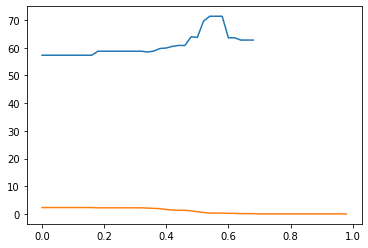

In [342]:
import matplotlib.pyplot as plt
plt.plot(T, simi)
plt.plot(T, comp)


In [370]:
f

,word,def,firstcontext,new_def,match
1,baying,prolonged howling,asked me whether i had on my medical journeys ...,utter in deep prolonged tones,0.408233
2,clandestine,secretive,had heard after i had returned to my room migh...,conducted with or marked by hidden aims or met...,0.548605
3,craniology,the study of skulls,an inconvenient extent i asked him casually to...,the scientific study of the skulls of various ...,0.221644
4,dolichocephalic,a medical condition in which the head is longe...,that of your friend . you interest me very muc...,an adult with a long narrow head,0.427
5,ferrule,a type of object used for fastening; used to d...,one has been so knocked about that i can hardl...,a metal cap or band placed on a wooden pole to...,0.583961
7,guttering,"flickering or low-lit, especially as regards a...","we could see whence it came , and then we knew...",provide with guttersgutter the buildings,0.682531
9,melancholy,a feeling of sadness,squares of the fields and the low curve of a w...,a feeling of thoughtful sadness,0.107809
10,mire,a stretch of swampy ground,"? â âyes , they seem more fertile than the...",a soft wet area of low-lying land that sinks u...,0.428102
12,quarry,a place from which stone has been excavated fr...,"a steep , boulder-sprinkled hill lay upon the ...",animal hunted or caught for food,0.651546
13,skein,a length of thread or yarn; the phase is used ...,sir henry . and now i pass on to another threa...,coils of worsted yarn,0.639506
